<a href="https://colab.research.google.com/github/HariCharan21903/Autism-Diagnosis/blob/main/Copy_of_Autism_Diagnosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
### define our metrics function with plotting confusion matrix
import itertools
from sklearn.metrics import confusion_matrix

### define function for plotting confusion matrix
def plot_confusion_matrix(y_true, y_preds):
    # Print confusion matrix
    cnf_matrix = confusion_matrix(y_true, y_preds)
    # Create the basic matrix
    plt.imshow(cnf_matrix,  cmap=plt.cm.Blues)
    # Add title and axis labels
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    # Add appropriate axis scales
    class_names = set(y) # Get class labels to add to matrix
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=0)
    plt.yticks(tick_marks, class_names)
    # Add labels to each cell
    thresh = cnf_matrix.max() / 2. # Used for text coloring below
    # Here we iterate through the confusion matrix and append labels to our visualization
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
            plt.text(j, i, cnf_matrix[i, j],
                     horizontalalignment='center',
                     color='white' if cnf_matrix[i, j] > thresh else 'black')
    # Add a legend
    plt.colorbar();
    plt.show();
def metrics(model_name, y_train, y_test, y_hat_train, y_hat_test):
    '''Print out the evaluation metrics for a given models predictions'''
    print(f'Model: {model_name}', )
    print('-'*60)
    plot_confusion_matrix(y_test,y_hat_test)
    print(f'test accuracy: {round(accuracy_score(y_test, y_hat_test),2)}')
    print(f'train accuracy: {round(accuracy_score(y_train, y_hat_train),2)}')
    print('-'*60)
    print('-'*60)
    print('Confusion Matrix:\n', pd.crosstab(y_test, y_hat_test, rownames=['Actual'], colnames=['Predicted'],margins = True))
    print('\ntest report:\n' + classification_report(y_test, y_hat_test))
    print('~'*60)
    print('\ntrain report:\n' + classification_report(y_train, y_hat_train))
    print('-'*60)

In [2]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8, 8))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns.values)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

In [3]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supress warnings
import warnings
warnings.filterwarnings("ignore")

# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier

# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet, LogisticRegression
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

# Modelling Helpers :
from sklearn.preprocessing import Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score, ShuffleSplit, cross_validate

# Preprocessing :
from sklearn.preprocessing import MinMaxScaler , StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Metrics :
# Regression
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error
from sklearn.metrics import accuracy_score,classification_report

# Classification
from sklearn.metrics import recall_score, f1_score, fbeta_score, r2_score, roc_auc_score, roc_curve, auc, cohen_kappa_score


## To display  all the interactive output without using the print function
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [4]:
import pandas as pd
df=pd.read_csv("/content/Autism_Screening_Data_Combined.csv") #Replaced spaces in file name with underscores

In [5]:
df.info()
df.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6075 entries, 0 to 6074
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   A1          6075 non-null   int64 
 1   A2          6075 non-null   int64 
 2   A3          6075 non-null   int64 
 3   A4          6075 non-null   int64 
 4   A5          6075 non-null   int64 
 5   A6          6075 non-null   int64 
 6   A7          6075 non-null   int64 
 7   A8          6075 non-null   int64 
 8   A9          6075 non-null   int64 
 9   A10         6075 non-null   int64 
 10  Age         6075 non-null   int64 
 11  Sex         6075 non-null   object
 12  Jauundice   6075 non-null   object
 13  Family_ASD  6075 non-null   object
 14  Class       6075 non-null   object
dtypes: int64(11), object(4)
memory usage: 712.0+ KB


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Sex,Jauundice,Family_ASD,Class
0,1,1,0,1,0,0,1,1,0,0,15,m,no,no,NO
1,0,1,1,1,0,1,1,0,1,0,15,m,no,no,NO
2,1,1,1,0,1,1,1,1,1,1,15,f,no,yes,YES
3,1,1,1,1,1,1,1,1,0,0,16,f,no,no,YES
4,1,1,1,1,1,1,1,1,1,1,15,f,no,no,YES
5,0,1,1,1,0,1,1,0,1,0,14,m,no,no,NO
6,1,0,0,0,1,0,0,1,0,1,14,f,no,no,NO
7,1,0,0,0,1,0,0,1,0,1,12,m,no,no,NO
8,1,0,0,0,1,0,0,1,0,1,15,f,no,no,NO
9,0,1,1,1,0,1,1,0,1,0,12,f,no,no,NO


In [6]:
df.shape

(6075, 15)

In [7]:
df.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age
count,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000,6075.000000
mean,0.693169,0.485103,0.537449,0.547490,0.543868,0.443128,0.497942,0.538436,0.429794,0.599835,19.838025
std,0.461217,0.499819,0.498637,0.497781,0.498113,0.496796,0.500037,0.498562,0.495087,0.489972,14.934246
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
50%,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,19.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,80.000000


In [8]:
df.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age',
       'Sex', 'Jauundice', 'Family_ASD', 'Class'],
      dtype='object')

In [10]:
# Assuming the actual column names are 'Case_No' and 'Who completed the test'
# Check if the columns exist in the DataFrame before dropping
if 'Case_No' in df.columns and 'Who completed the test' in df.columns:
    df.drop(['Case_No', 'Who completed the test'], axis=1, inplace=True)
else:
    print("One or both columns not found in DataFrame.")
    # Optionally, you can list the columns of your DataFrame to inspect
    print(df.columns)

One or both columns not found in DataFrame.
Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age',
       'Sex', 'Jauundice', 'Family_ASD', 'Class'],
      dtype='object')


In [ ]:
# Checking null data
df.isnull().sum()

A1                     0
A2                     0
A3                     0
A4                     0
A5                     0
A6                     0
A7                     0
A8                     0
A9                     0
A10                    0
Age_Mons               0
Qchat-10-Score         0
Sex                    0
Ethnicity              0
Jaundice               0
Family_mem_with_ASD    0
Class/ASD Traits       0
dtype: int64

In [ ]:
df.dtypes

A1                      int64
A2                      int64
A3                      int64
A4                      int64
A5                      int64
A6                      int64
A7                      int64
A8                      int64
A9                      int64
A10                     int64
Age_Mons                int64
Qchat-10-Score          int64
Sex                    object
Ethnicity              object
Jaundice               object
Family_mem_with_ASD    object
Class/ASD Traits       object
dtype: object

In [ ]:
try:
    # Find the row containing the string value 'f'
    row_with_error = df[df['A1'] == 'f'].index[0]

    # Print the entire row
    print(df.loc[row_with_error])
except IndexError:
    print("Column 'A1' does not contain the value 'f' or the DataFrame is empty.")

Column 'A1' does not contain the value 'f' or the DataFrame is empty.


<Figure size 1600x800 with 0 Axes>

<Axes: xlabel='Jaundice', ylabel='count'>

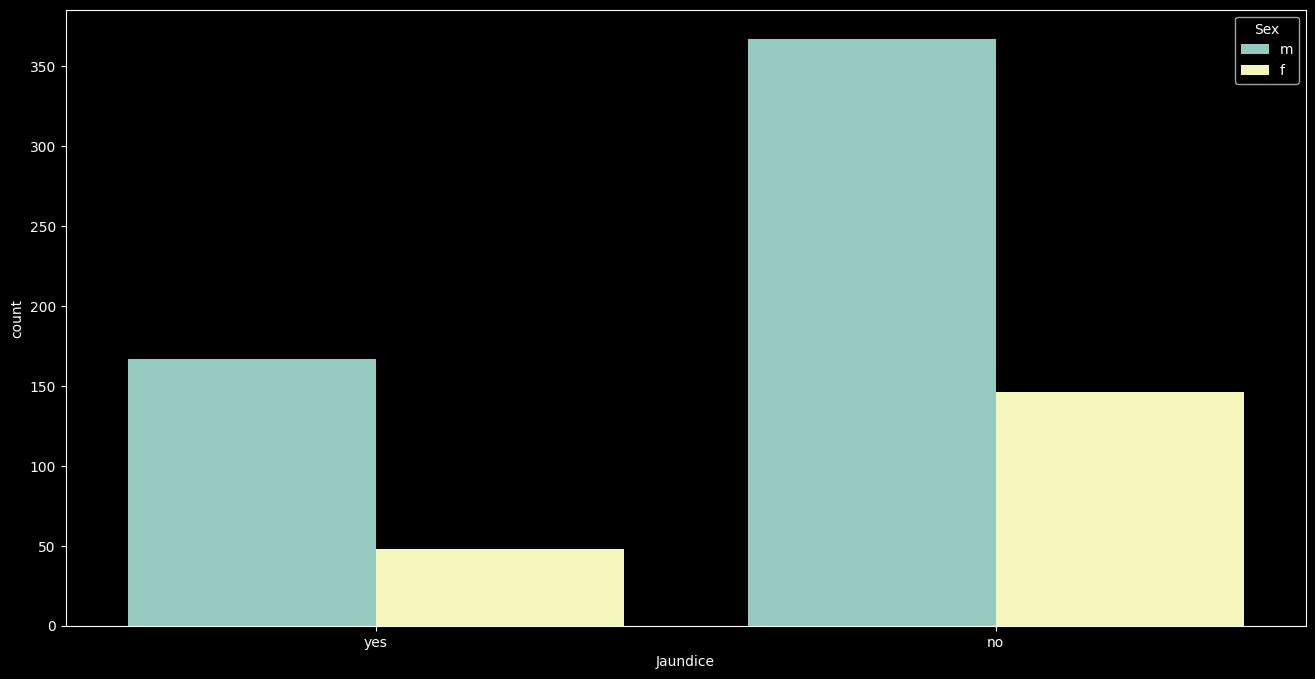

In [ ]:
# Visualizing Juandice occurance in males and females
plt.figure(figsize = (16,8))

plt.style.use('dark_background')
sns.countplot(x = 'Jaundice', hue = 'Sex', data = yes_autism)

<Axes: xlabel='Qchat-10-Score', ylabel='count'>

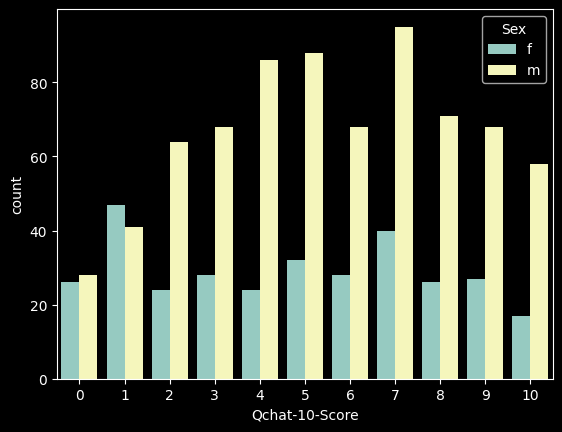

In [ ]:
sns.countplot(x = 'Qchat-10-Score', hue = 'Sex', data = df)

<Axes: xlabel='Age_Mons', ylabel='count'>

Text(0.5, 0, 'Toddlers age in months')

Text(0.5, 1.0, 'Age distribution of ASD positive')

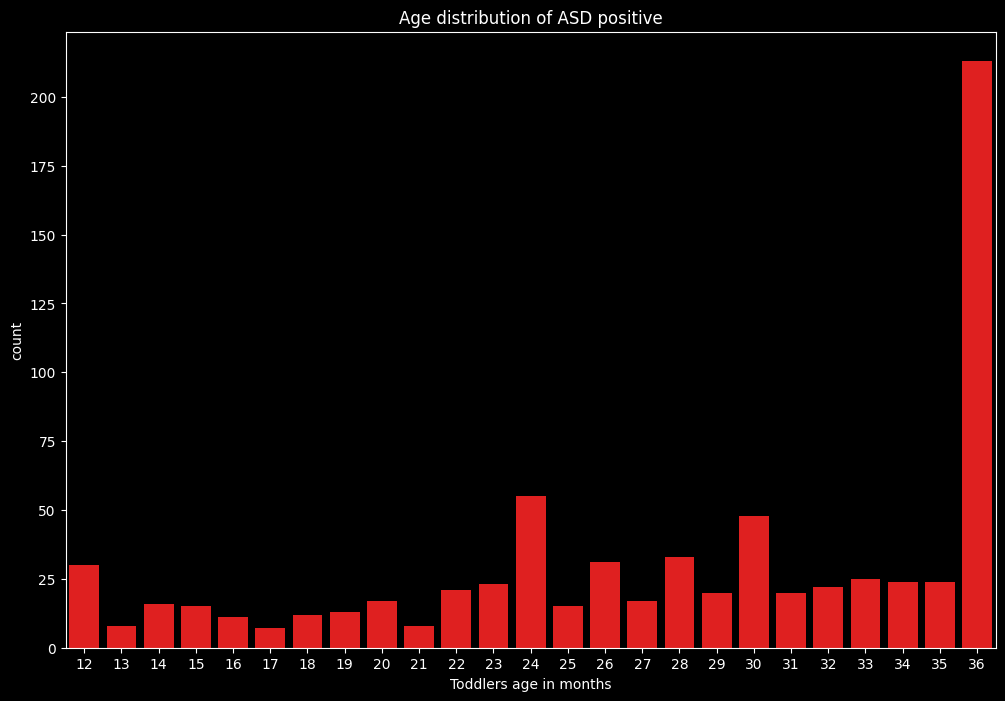

In [ ]:
#Visualizing  the age distribution of Positive ASD  among Todllers


f, ax = plt.subplots(figsize=(12, 8))
sns.countplot(x="Age_Mons", data=yes_autism, color="r");

plt.style.use('dark_background')
ax.set_xlabel('Toddlers age in months')
ax.set_title('Age distribution of ASD positive')



<Figure size 1600x800 with 0 Axes>

<Axes: xlabel='Ethnicity', ylabel='count'>

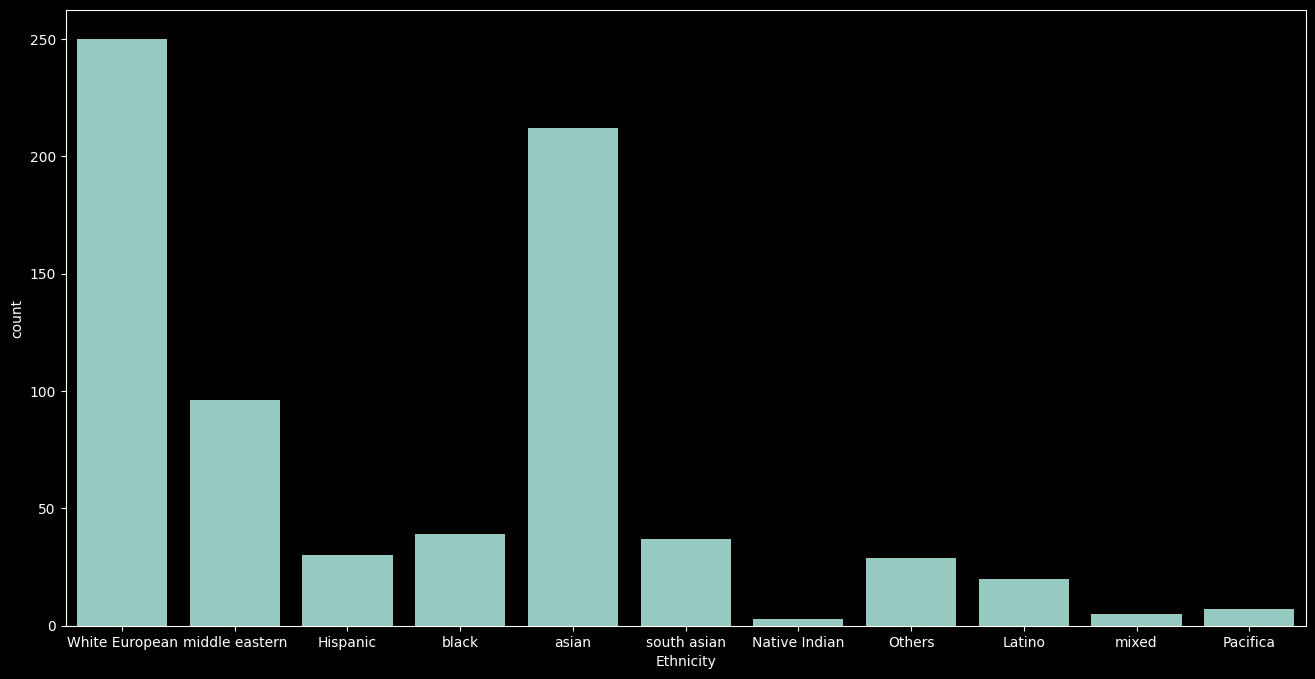

In [ ]:
plt.figure(figsize = (16,8))
sns.countplot(x = 'Ethnicity', data = yes_autism)

<Figure size 2000x600 with 0 Axes>

<Axes: xlabel='Ethnicity', ylabel='count'>

Text(0.5, 1.0, 'Ethnicity Distribution of Positive ASD among Toddlers')

Text(0.5, 0, 'Ethnicity')

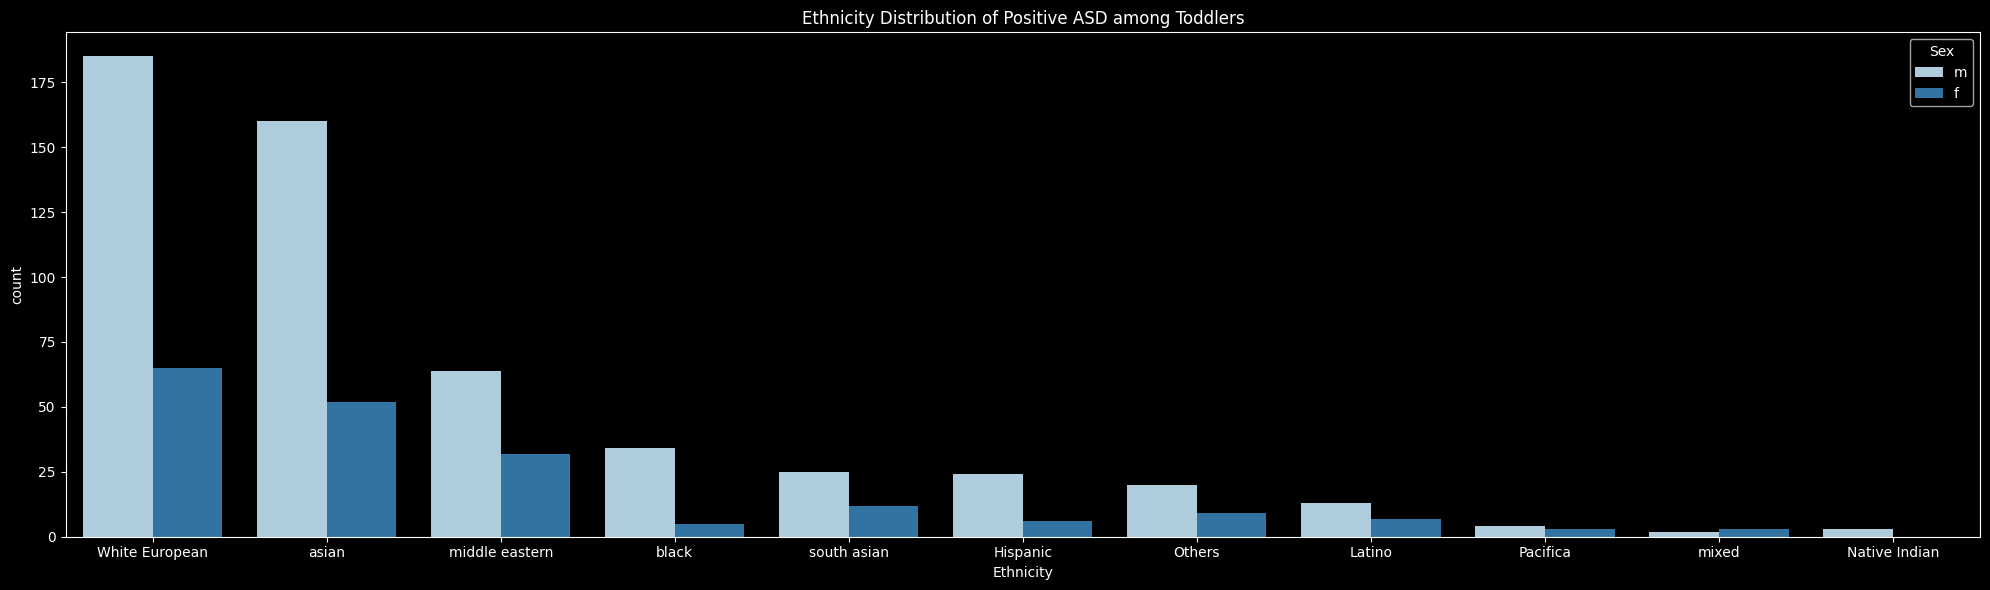

In [ ]:
#  visualize positive  ASD among Toddlers based on Ethnicity
plt.figure(figsize=(20,6))
sns.countplot(x='Ethnicity',data=yes_autism,order= yes_autism['Ethnicity'].value_counts().index[:11],hue='Sex',palette='Paired')
plt.title('Ethnicity Distribution of Positive ASD among Toddlers')
plt.xlabel('Ethnicity')
plt.tight_layout()


In [ ]:
# Displaying number of positive cases of Autisim with Regards Ethnicity
yes_autism['Ethnicity'].value_counts()

Ethnicity
White European    250
asian             212
middle eastern     96
black              39
south asian        37
Hispanic           30
Others             29
Latino             20
Pacifica            7
mixed               5
Native Indian       3
Name: count, dtype: int64

<Axes: xlabel='Family_mem_with_ASD', ylabel='count'>

Text(0.5, 1.0, 'Positive ASD Toddler relatives with Autism distribution for different ethnicities')

Text(0.5, 0, 'Toddler Relatives with ASD')

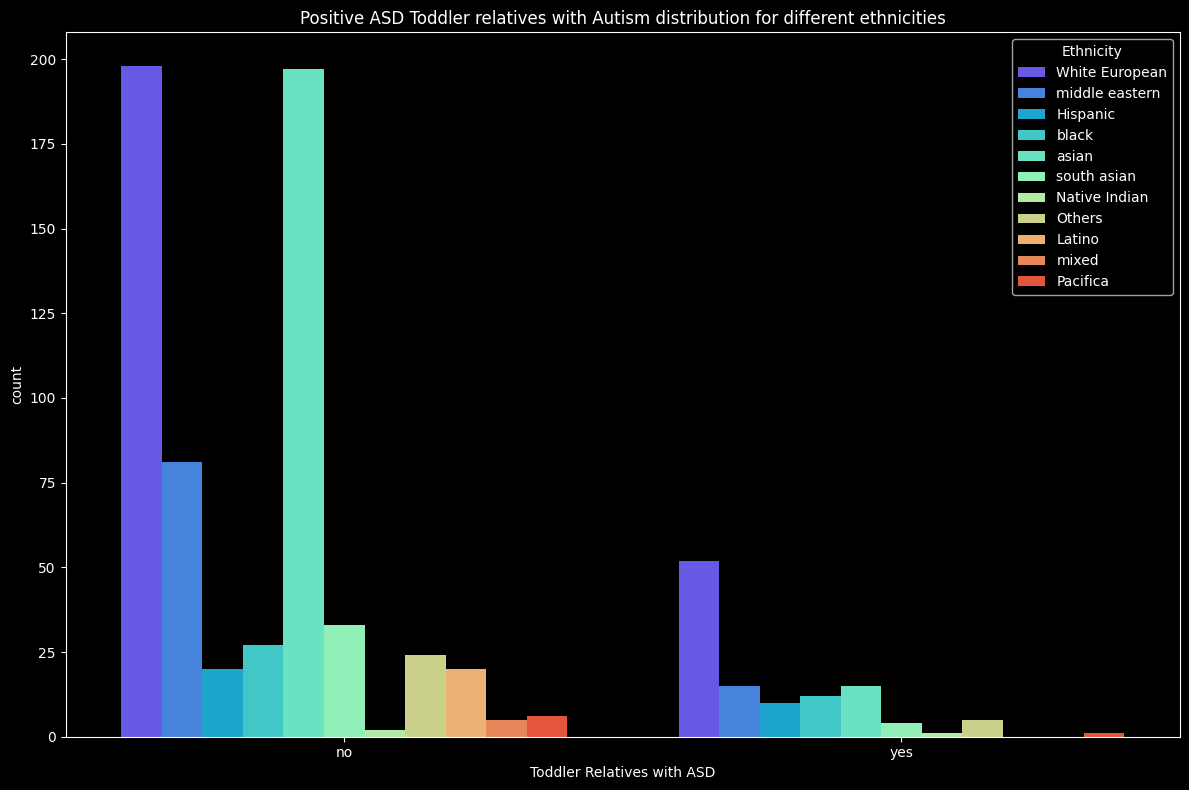

In [ ]:
#Lets visualize the distribution of autism in family within different ethnicity
f, ax = plt.subplots(figsize=(12, 8))


sns.countplot(x='Family_mem_with_ASD',data=yes_autism,hue='Ethnicity',palette='rainbow',ax=ax)
ax.set_title('Positive ASD Toddler relatives with Autism distribution for different ethnicities')
ax.set_xlabel('Toddler Relatives with ASD')
plt.tight_layout()




In [ ]:
# removing 'Qchat-10-Score'
df.drop('Qchat-10-Score', axis = 1, inplace = True)

In [ ]:
le = LabelEncoder()
columns = ['Ethnicity', 'Family_mem_with_ASD', 'Class/ASD Traits ', 'Sex', 'Jaundice']
for col in columns:
    df[col] = le.fit_transform(df[col])
df.dtypes


A1                     int64
A2                     int64
A3                     int64
A4                     int64
A5                     int64
A6                     int64
A7                     int64
A8                     int64
A9                     int64
A10                    int64
Age_Mons               int64
Sex                    int64
Ethnicity              int64
Jaundice               int64
Family_mem_with_ASD    int64
Class/ASD Traits       int64
dtype: object

In [ ]:
df.head(25)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,28,0,8,1,0,0
1,1,1,0,0,0,1,1,0,0,0,36,1,5,1,0,1
2,1,0,0,0,0,0,1,1,0,1,36,1,8,1,0,1
3,1,1,1,1,1,1,1,1,1,1,24,1,0,0,0,1
4,1,1,0,1,1,1,1,1,1,1,20,0,5,0,1,1
5,1,1,0,0,1,1,1,1,1,1,21,1,7,0,0,1
6,1,0,0,1,1,1,0,0,1,0,33,1,6,1,0,1
7,0,1,0,0,1,0,1,1,1,1,33,1,6,1,0,1
8,0,0,0,0,0,0,1,0,0,1,36,1,6,0,0,0
9,1,1,1,0,1,1,0,1,1,1,22,1,10,0,0,1


In [ ]:
X = df.drop(['Class/ASD Traits '], axis = 1)
y = df['Class/ASD Traits ']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state =42)
X.isnull().sum()
X.info()

A1                     0
A2                     0
A3                     0
A4                     0
A5                     0
A6                     0
A7                     0
A8                     0
A9                     0
A10                    0
Age_Mons               0
Sex                    0
Ethnicity              0
Jaundice               0
Family_mem_with_ASD    0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   A1                   1054 non-null   int64
 1   A2                   1054 non-null   int64
 2   A3                   1054 non-null   int64
 3   A4                   1054 non-null   int64
 4   A5                   1054 non-null   int64
 5   A6                   1054 non-null   int64
 6   A7                   1054 non-null   int64
 7   A8                   1054 non-null   int64
 8   A9                   1054 non-null   int64
 9   A10                  1054 non-null   int64
 10  Age_Mons             1054 non-null   int64
 11  Sex                  1054 non-null   int64
 12  Ethnicity            1054 non-null   int64
 13  Jaundice             1054 non-null   int64
 14  Family_mem_with_ASD  1054 non-null   int64
dtypes: int64(15)
memory usage: 123.6 KB


LogisticRegression()

LR Accuracy Score is :  1
Model: LR
------------------------------------------------------------


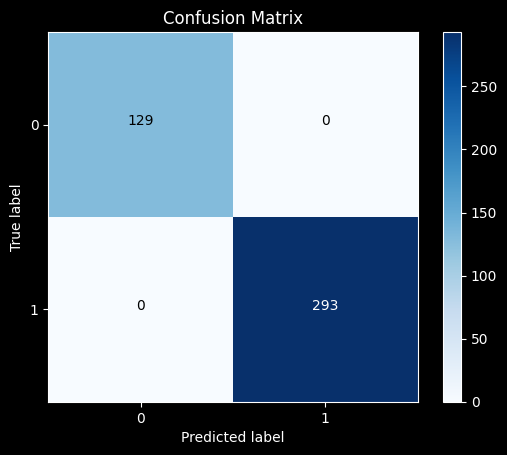

test accuracy: 1.0
train accuracy: 1.0
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted    0    1  All
Actual                  
0          129    0  129
1            0  293  293
All        129  293  422

test report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       1.00      1.00      1.00       293

    accuracy                           1.00       422
   macro avg       1.00      1.00      1.00       422
weighted avg       1.00      1.00      1.00       422

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       197
           1       1.00      1.00      1.00       435

    accuracy                           1.00       632
   macro avg       1.00      1.00      1.00       632
weight

LinearDiscriminantAnalysis()

LDA Accuracy Score is :  1
Model: LDA
------------------------------------------------------------


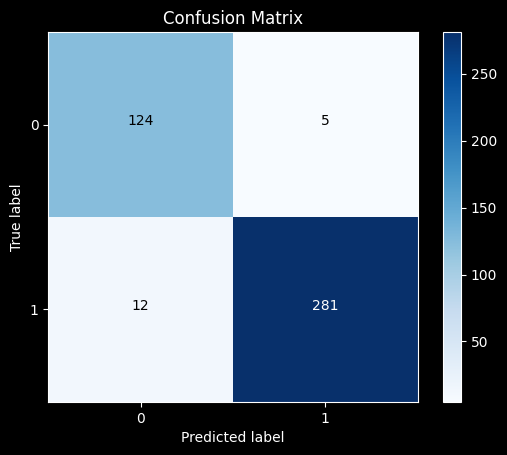

test accuracy: 0.96
train accuracy: 0.96
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted    0    1  All
Actual                  
0          124    5  129
1           12  281  293
All        136  286  422

test report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       129
           1       0.98      0.96      0.97       293

    accuracy                           0.96       422
   macro avg       0.95      0.96      0.95       422
weighted avg       0.96      0.96      0.96       422

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       197
           1       0.99      0.95      0.97       435

    accuracy                           0.96       632
   macro avg       0.94      0.96      0.95       632
weig

KNeighborsClassifier()

KNN Accuracy Score is :  1
Model: KNN
------------------------------------------------------------


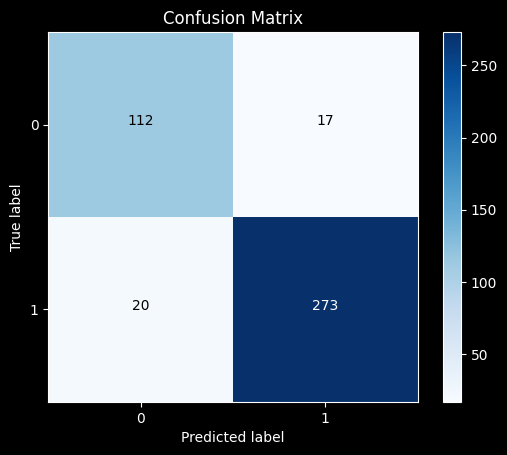

test accuracy: 0.91
train accuracy: 0.95
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted    0    1  All
Actual                  
0          112   17  129
1           20  273  293
All        132  290  422

test report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       129
           1       0.94      0.93      0.94       293

    accuracy                           0.91       422
   macro avg       0.89      0.90      0.90       422
weighted avg       0.91      0.91      0.91       422

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       197
           1       0.97      0.95      0.96       435

    accuracy                           0.95       632
   macro avg       0.93      0.95      0.94       632
weig

DecisionTreeClassifier()

CART Accuracy Score is :  1
Model: CART
------------------------------------------------------------


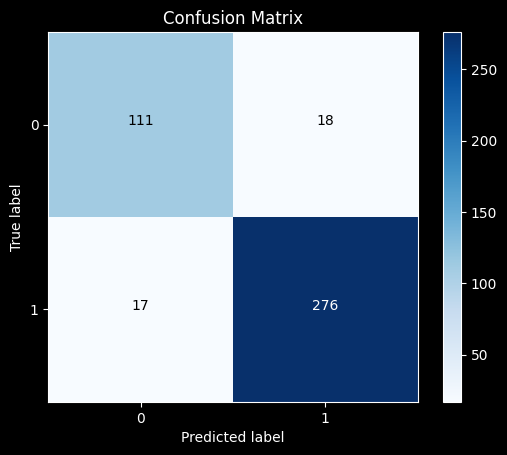

test accuracy: 0.92
train accuracy: 1.0
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted    0    1  All
Actual                  
0          111   18  129
1           17  276  293
All        128  294  422

test report:
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       129
           1       0.94      0.94      0.94       293

    accuracy                           0.92       422
   macro avg       0.90      0.90      0.90       422
weighted avg       0.92      0.92      0.92       422

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       197
           1       1.00      1.00      1.00       435

    accuracy                           1.00       632
   macro avg       1.00      1.00      1.00       632
weigh

GaussianNB()

NB Accuracy Score is :  1
Model: NB
------------------------------------------------------------


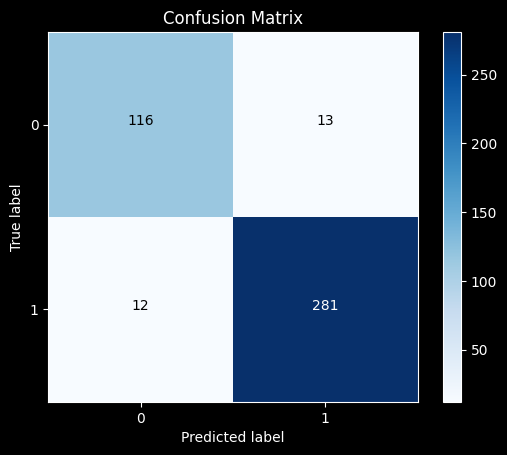

test accuracy: 0.94
train accuracy: 0.95
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted    0    1  All
Actual                  
0          116   13  129
1           12  281  293
All        128  294  422

test report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       129
           1       0.96      0.96      0.96       293

    accuracy                           0.94       422
   macro avg       0.93      0.93      0.93       422
weighted avg       0.94      0.94      0.94       422

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       197
           1       0.97      0.97      0.97       435

    accuracy                           0.95       632
   macro avg       0.95      0.95      0.95       632
weig

SVC()

SVM Accuracy Score is :  1
Model: SVM
------------------------------------------------------------


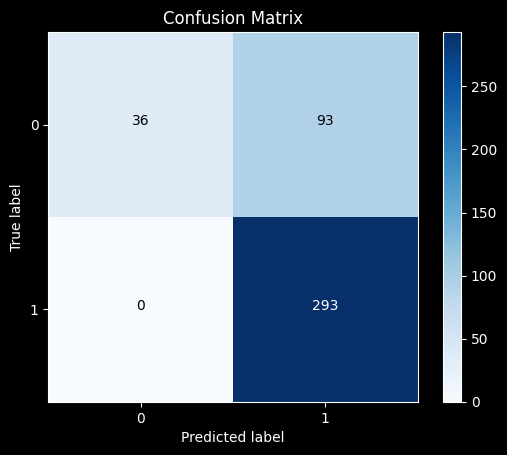

test accuracy: 0.78
train accuracy: 0.78
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted   0    1  All
Actual                 
0          36   93  129
1           0  293  293
All        36  386  422

test report:
              precision    recall  f1-score   support

           0       1.00      0.28      0.44       129
           1       0.76      1.00      0.86       293

    accuracy                           0.78       422
   macro avg       0.88      0.64      0.65       422
weighted avg       0.83      0.78      0.73       422

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       1.00      0.29      0.45       197
           1       0.76      1.00      0.86       435

    accuracy                           0.78       632
   macro avg       0.88      0.65      0.66       632
weighted 

RandomForestRegressor()

RF Accuracy Score is :  1
Model: RF
------------------------------------------------------------


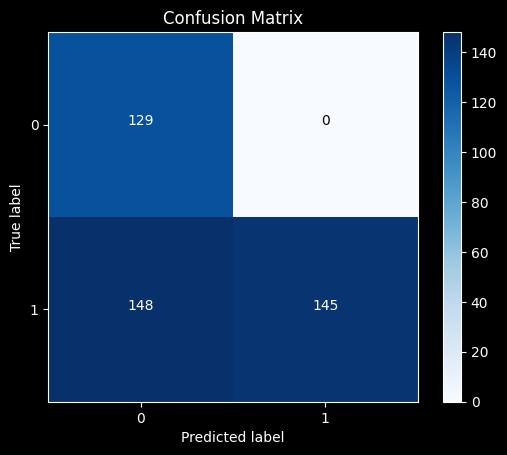

test accuracy: 0.65
train accuracy: 0.71
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted    0    1  All
Actual                  
0          129    0  129
1          148  145  293
All        277  145  422

test report:
              precision    recall  f1-score   support

           0       0.47      1.00      0.64       129
           1       1.00      0.49      0.66       293

    accuracy                           0.65       422
   macro avg       0.73      0.75      0.65       422
weighted avg       0.84      0.65      0.65       422

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       0.51      1.00      0.68       197
           1       1.00      0.57      0.73       435

    accuracy                           0.71       632
   macro avg       0.76      0.79      0.70       632
weig

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

XGB Accuracy Score is :  1
Model: XGB
------------------------------------------------------------


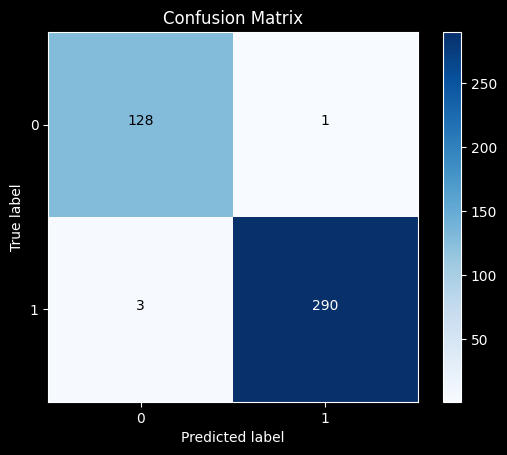

test accuracy: 0.99
train accuracy: 1.0
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted    0    1  All
Actual                  
0          128    1  129
1            3  290  293
All        131  291  422

test report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       129
           1       1.00      0.99      0.99       293

    accuracy                           0.99       422
   macro avg       0.99      0.99      0.99       422
weighted avg       0.99      0.99      0.99       422

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       197
           1       1.00      1.00      1.00       435

    accuracy                           1.00       632
   macro avg       1.00      1.00      1.00       632
weigh

GradientBoostingRegressor()

GBR Accuracy Score is :  1
Model: GBR
------------------------------------------------------------


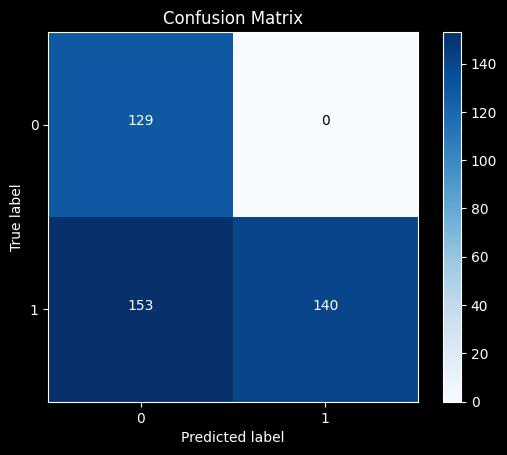

test accuracy: 0.64
train accuracy: 0.63
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted    0    1  All
Actual                  
0          129    0  129
1          153  140  293
All        282  140  422

test report:
              precision    recall  f1-score   support

           0       0.46      1.00      0.63       129
           1       1.00      0.48      0.65       293

    accuracy                           0.64       422
   macro avg       0.73      0.74      0.64       422
weighted avg       0.83      0.64      0.64       422

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       0.46      1.00      0.63       197
           1       1.00      0.47      0.64       435

    accuracy                           0.63       632
   macro avg       0.73      0.73      0.63       632
weig

AdaBoostRegressor()

ABR Accuracy Score is :  1
Model: ABR
------------------------------------------------------------


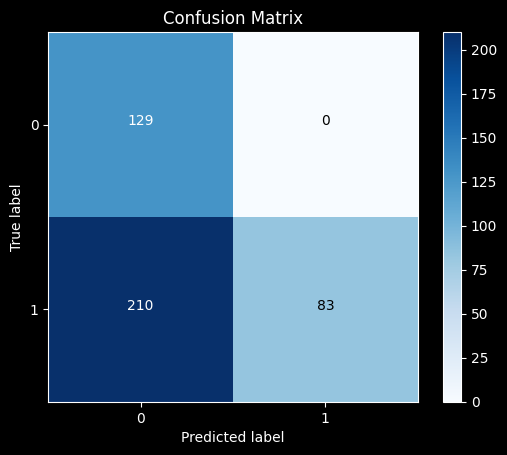

test accuracy: 0.5
train accuracy: 0.48
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted    0   1  All
Actual                 
0          129   0  129
1          210  83  293
All        339  83  422

test report:
              precision    recall  f1-score   support

           0       0.38      1.00      0.55       129
           1       1.00      0.28      0.44       293

    accuracy                           0.50       422
   macro avg       0.69      0.64      0.50       422
weighted avg       0.81      0.50      0.48       422

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       0.37      1.00      0.54       197
           1       1.00      0.24      0.39       435

    accuracy                           0.48       632
   macro avg       0.69      0.62      0.47       632
weighted a

In [ ]:


models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestRegressor()))
models.append(('XGB', XGBClassifier()))
models.append(('GBR', GradientBoostingRegressor()))
models.append(('ABR', AdaBoostRegressor()))

for name, model in models:
    model.fit(X_train, y_train)
    y_hat_test = model.predict(X_test).astype(int)
    y_hat_train = model.predict(X_train).astype(int)
    print(name, 'Accuracy Score is : ', round(accuracy_score(y_test, y_hat_test)))

    metrics(name, y_train, y_test, y_hat_train, y_hat_test)



